# Init

In [1]:
!pip install deepsig tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel
from deepsig import multi_aso, aso
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output 

# Conventional

In [ ]:
df = pd.read_csv('Result/Conventioanl_ML_Validation.csv', index_col='Id')
df.head()

,Preprocess,SVD,Model,Multilabel Approach,Accuracy,F1-Score,Hamming Loss
Id,,,,,,,
raw_svd100_logreg_br,raw,svd100,logreg,br,0.2412,0.3721,0.0633
raw_svd100_logreg_cc,raw,svd100,logreg,cc,0.3260,0.4660,0.0588
raw_svd100_sgd_logreg_br,raw,svd100,sgd_logreg,br,0.3901,0.5390,0.0558
raw_svd100_sgd_logreg_cc,raw,svd100,sgd_logreg,cc,0.4524,0.5616,0.0585
raw_svd100_svc_br,raw,svd100,svc,br,0.4298,0.5685,0.0508


In [ ]:
df = df.sort_index()

In [ ]:
for i in ["Accuracy", "F1-Score", "Hamming Loss"]:
  df[i] = np.round(df[i], 4)
df.head()

,Id,Accuracy,F1-Score,Hamming Loss
0,raw_non_logreg_br,0.2635,0.4030,0.0622
1,raw_non_logreg_cc,0.2900,0.4331,0.0608
2,raw_non_nb_br,0.2816,0.4309,0.0628
3,raw_non_nb_cc,0.2900,0.4358,0.0624
4,raw_non_sgd_br,0.3828,0.5354,0.0610


In [ ]:
import pandas as pd

def df_to_latex(df):
    """
    Transforms a Pandas DataFrame into a LaTeX table in string format.
    """
    # Convert the DataFrame to LaTeX table format
    latex_table = df.to_latex(index=False)

    # Replace the default column separator with vertical bars
    latex_table = latex_table.replace('\\\\\n', ' \\\\ \\hline\n')
    latex_table = latex_table.replace('\\begin{tabular}', '\\begin{tabular}{|' + '|'.join(['c'] * len(df.columns)) + '|}')

    # Remove the default top and bottom rules
    latex_table = latex_table.replace('\\toprule\n', '')
    latex_table = latex_table.replace('\\bottomrule\n', '')

    # Return the LaTeX table as a string
    return latex_table

# Example usage
df = df.reset_index()[["Id", "Accuracy", "F1-Score", "Hamming Loss"]]
latex_table = df_to_latex(df)
print(latex_table)


In [ ]:
import math
from scipy.stats import rankdata
def plot(col, val, title, is_highest):
  plt.figure(figsize = (5, 3))
  ranks = rankdata(val)
  # if is_highest:
  #   ranks = len(val) - rankdata(val) + 1
  # Define a colormap
  cmap = plt.get_cmap('PuBu')
  # Create a bar plot and color the bars by rank
  plt.bar(col, val, width = 0.4, color=cmap(ranks/len(val)))
  # plt.xlabel("Courses offered")
  plt.ylabel("Geomean")
  plt.title(mode)
  plt.show()

In [ ]:
from itertools import combinations, permutations
from scipy.stats import ttest_ind

def create_table(dict_values, comparisons):
    """Create a table of comparison results."""
    table = [[''] + list(dict_values.keys())]
    for key1 in dict_values.keys():
        row = [key1]
        for key2 in dict_values.keys():
            if key1 == key2:
                row.append('-')
            else:
              rating = get_comparison_score(comparisons[(key1, key2)])
              if rating == 1:
                  row.append('good')
              elif rating == -1:
                  row.append('bad')
              else:
                  row.append('unk')
        table.append(row)
    return table

import numpy as np
from itertools import permutations
from scipy.stats import ttest_ind

def perform_t_test(dict_values):
    """Perform t-test comparisons between all pairs of values in a dictionary."""
    comparisons = {}
    for key1, key2 in permutations(dict_values.keys(), 2):
        comparison = ttest_ind(dict_values[key1], dict_values[key2], equal_var=False)
        comparisons[(key1, key2)] = comparison
    return comparisons

def get_comparison_score(comparison):
    """Get a score representing the result of a comparison."""
    if comparison is None:
        return 0  # No data available
    elif comparison.pvalue >= 0.05:
        return 0  # No evidence
    elif comparison.statistic > 0:
        return 1  # Better
    else:
        return -1  # Worse

def create_ranking(dict_values, comparisons, reverse=False):
    """Create a ranking of keys based on the total comparison score."""
    ranking = sorted(dict_values.keys(), key=lambda k: sum(get_comparison_score(comparisons.get((k, other))) for other in dict_values.keys() if k != other), reverse=reverse)
    return ranking

# Example usage
my_dict = {
    'A': np.array([10, 20, 30, 40, 50]),
    'B': np.array([5, 4, 3, 2, 1]),
    'C': np.array([3, 3, 3, 3, 3]),
}

# Perform t-tests on all pairs of values
comparisons = perform_t_test(my_dict)
table = create_table(my_dict, comparisons)
for row in table:
    print('\t'.join(row))
print()
# Create a ranking of keys based on the total comparison score
ranking_high = create_ranking(my_dict, comparisons, reverse=True)

# Print the ranking
print("Keys with the highest total comparison score:")
for i, key in enumerate(ranking_high):
    print(f"{i+1}. {key}")

	A	B	C
A	-	good	good
B	bad	-	unk
C	bad	unk	-

Keys with the highest total comparison score:
1. A
2. B
3. C


<ipython-input-4-df24c2b3eea8>:31: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  comparison = ttest_ind(dict_values[key1], dict_values[key2], equal_var=False)


## Multilabel approach

In [ ]:
# Example usage
A = df[df['Multilabel Approach'] == 'br']
B = df[df['Multilabel Approach'] == 'cc']

for mode, is_highest in zip(["Accuracy", 'F1-Score', 'Hamming Loss'], [True, True, False]):
  print(mode)
  my_dict = {'br': A[mode].values, 'cc': B[mode].values}
  comparisons = perform_t_test(my_dict)
  table = create_table(my_dict, comparisons)
  for row in table:
      print('\t'.join(row))
  print()

  ranking_high = create_ranking(my_dict, comparisons, reverse=is_highest)
  print(f"Metode terbaik berdasarkan {mode}")
  for i, key in enumerate(ranking_high):
      print(f'{i+1}. {key}')
  print()

Accuracy
	br	cc
br	-	bad
cc	good	-

Metode terbaik berdasarkan Accuracy
1. cc
2. br

F1-Score
	br	cc
br	-	unk
cc	unk	-

Metode terbaik berdasarkan F1-Score
1. br
2. cc

Hamming Loss
	br	cc
br	-	unk
cc	unk	-

Metode terbaik berdasarkan Hamming Loss
1. br
2. cc



## Preprocess

In [ ]:
# Example usage
A = df[df['Preprocess'] == 'raw']
B = df[df['Preprocess'] == 'stem']
C = df[df['Preprocess'] == 'stemstop']

for mode, is_highest in zip(["Accuracy", 'F1-Score', 'Hamming Loss'], [True, True, False]):
  print(mode)
  my_dict = {'raw': A[mode].values, 'stem': B[mode].values, 'stetop': C[mode].values}
  comparisons = perform_t_test(my_dict)
  table = create_table(my_dict, comparisons)
  for row in table:
      print('\t'.join(row))
  print()

  ranking_high = create_ranking(my_dict, comparisons, reverse=is_highest)
  print(f"Metode terbaik berdasarkan {mode}")
  for i, key in enumerate(ranking_high):
      print(f'{i+1}. {key}')
  print()

Accuracy
	raw	stem	stetop
raw	-	unk	bad
stem	unk	-	bad
stetop	good	good	-

Metode terbaik berdasarkan Accuracy
1. stetop
2. raw
3. stem

F1-Score
	raw	stem	stetop
raw	-	unk	bad
stem	unk	-	bad
stetop	good	good	-

Metode terbaik berdasarkan F1-Score
1. stetop
2. raw
3. stem

Hamming Loss
	raw	stem	stetop
raw	-	unk	good
stem	unk	-	good
stetop	bad	bad	-

Metode terbaik berdasarkan Hamming Loss
1. stetop
2. raw
3. stem



StemStop >>> Stem >>> Raw

## SVD

[0.2946170511449008, 0.3959702139696283, 0.3831889687549967, 0.35849302515487924]


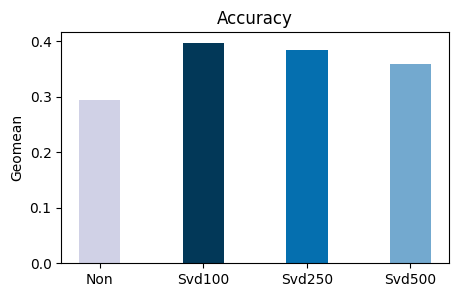


[0.42754926740514615, 0.5318371466749243, 0.5180073137083638, 0.4942131843575596]


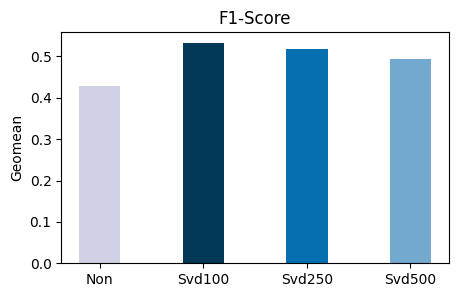


[0.06164036373399149, 0.05725527280780247, 0.05906047140878533, 0.0600638306574565]


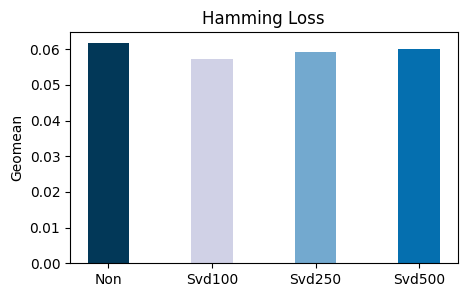

In [ ]:
from scipy.stats import gmean
A = df[(df['SVD'] == 'non')]
B = df[df['SVD'] == 'svd100']
C = df[df['SVD'] == 'svd250']
D = df[df['SVD'] == 'svd500']
col = ['Non', 'Svd100', 'Svd250', 'Svd500']

for mode, is_highest in zip(["Accuracy", 'F1-Score', 'Hamming Loss'], [True, True, False]):
  non = gmean(A[mode].values)
  svd100 = gmean(B[mode].values)
  svd250 = gmean(C[mode].values)
  svd500 = gmean(D[mode].values)
  print([non, svd100, svd250, svd500])
  plot(col, [non, svd100, svd250, svd500], mode, is_highest)
  print()

SVD 100 > SVD250 >> SVD500 >>> Non

## Model

In [ ]:
mode = "Accuracy"
my_dict = {'logreg': A[mode].values, 'sgd_log': B[mode].values, 'svc': C[mode].values,
             'sgd_svc': D[mode].values, 'tree': E[mode].values, 'xgb': F[mode].values, 'nb': G[mode].values}
my_dict

{'logreg': array([0.2412, 0.326 , 0.2536, 0.3342, 0.2506, 0.3204, 0.2501, 0.2779,
        0.2573, 0.3412, 0.2671, 0.3473, 0.2612, 0.3335, 0.2617, 0.2886,
        0.3428, 0.4184, 0.3569, 0.426 , 0.349 , 0.4115, 0.3416, 0.3821]),
 'sgd_log': array([0.3901, 0.4524, 0.3776, 0.4591, 0.4214, 0.454 , 0.3364, 0.368 ,
        0.4052, 0.4547, 0.4087, 0.4589, 0.421 , 0.4689, 0.3413, 0.3782,
        0.4453, 0.5079, 0.4184, 0.5051, 0.4466, 0.4858, 0.4208, 0.4773]),
 'svc': array([0.4298, 0.5092, 0.3996, 0.4699, 0.2629, 0.3628, 0.0429, 0.0526,
        0.441 , 0.5228, 0.4108, 0.4862, 0.2706, 0.3819, 0.0512, 0.0613,
        0.4792, 0.5471, 0.4543, 0.5111, 0.3506, 0.4371, 0.1777, 0.2068]),
 'sgd_svc': array([0.381 , 0.4365, 0.3488, 0.4102, 0.3152, 0.4073, 0.3626, 0.3959,
        0.3857, 0.4513, 0.3528, 0.4208, 0.3662, 0.398 , 0.3651, 0.4026,
        0.4486, 0.483 , 0.3881, 0.4332, 0.343 , 0.4158, 0.4398, 0.4815]),
 'tree': array([0.3104, 0.3074, 0.3052, 0.3108, 0.2928, 0.2936, 0.3577, 0.3748,
        0

In [ ]:
A = df[df['Model'] == 'logreg']
B = df[df['Model'] == 'sgd_logreg']
C = df[df['Model'] == 'svc']
D = df[df['Model'] == 'sgd_svc']
E = df[df['Model'] == 'tree']
F = df[df['Model'] == 'xgb']
G = df[df['Model'] == 'nb']

# Example usage
for mode, is_highest in zip(["Accuracy", 'F1-Score', 'Hamming Loss'], [True, True, False]):
  print(mode)
  my_dict = {'logreg': A[mode].values, 'sgd_log': B[mode].values, 'svc': C[mode].values,
             'sgd_svc': D[mode].values, 'tree': E[mode].values, 'xgb': F[mode].values, 'nb': G[mode].values}
  comparisons = perform_t_test(my_dict)
  table = create_table(my_dict, comparisons)
  for row in table:
      print('\t'.join(row))
  print()

  ranking_high = create_ranking(my_dict, comparisons, reverse=is_highest)
  print(f"Metode terbaik berdasarkan {mode}")
  for i, key in enumerate(ranking_high):
      print(f'{i+1}. {key}')
  print()

Accuracy
	logreg	sgd_log	svc	sgd_svc	tree	xgb	nb
logreg	-	bad	unk	bad	unk	bad	unk
sgd_log	good	-	good	good	good	unk	good
svc	unk	bad	-	unk	unk	unk	unk
sgd_svc	good	bad	unk	-	good	unk	unk
tree	unk	bad	unk	bad	-	bad	unk
xgb	good	unk	unk	unk	good	-	unk
nb	unk	bad	unk	unk	unk	unk	-

Metode terbaik berdasarkan Accuracy
1. sgd_log
2. xgb
3. sgd_svc
4. svc
5. nb
6. logreg
7. tree

F1-Score
	logreg	sgd_log	svc	sgd_svc	tree	xgb	nb
logreg	-	bad	unk	bad	unk	bad	unk
sgd_log	good	-	good	good	good	unk	good
svc	unk	bad	-	bad	unk	bad	unk
sgd_svc	good	bad	good	-	good	unk	unk
tree	unk	bad	unk	bad	-	bad	unk
xgb	good	unk	good	unk	good	-	unk
nb	unk	bad	unk	unk	unk	unk	-

Metode terbaik berdasarkan F1-Score
1. sgd_log
2. xgb
3. sgd_svc
4. nb
5. logreg
6. svc
7. tree

Hamming Loss
	logreg	sgd_log	svc	sgd_svc	tree	xgb	nb
logreg	-	good	unk	bad	bad	good	unk
sgd_log	bad	-	bad	bad	bad	good	unk
svc	unk	good	-	unk	unk	good	unk
sgd_svc	good	good	unk	-	bad	good	unk
tree	good	good	unk	good	-	good	good
xgb	bad	bad	bad	

[0.31353611523988156, 0.42672166336512496, 0.2779707106696306, 0.39912713776073666, 0.3270713463341342, 0.4084314093260934, 0.3227942166346758]


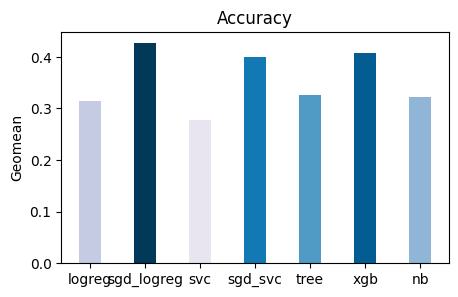


[0.45354411183851806, 0.562872765648863, 0.37507688359692504, 0.5388438573972434, 0.48235268527971553, 0.550944393947875, 0.47068958787208814]


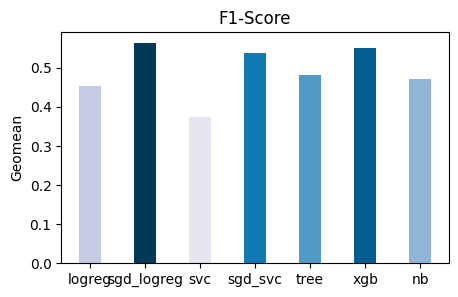


[0.058793735508018294, 0.05667473618138292, 0.0610157648076321, 0.0623039687172192, 0.06518233044174324, 0.053912087911646665, 0.06045488814288833]


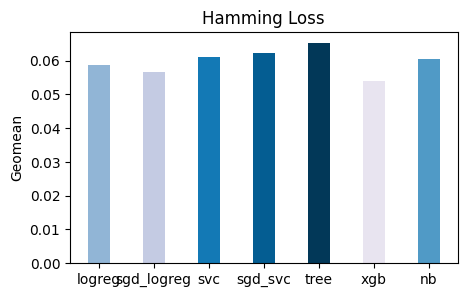

In [ ]:
for mode, is_highest in zip(["Accuracy", 'F1-Score', 'Hamming Loss'], [True, True, False]):
  my_dict = {'logreg': A[mode].values, 'sgd_logreg': B[mode].values, 'svc': C[mode].values,
             'sgd_svc': D[mode].values, 'tree': E[mode].values, 'xgb': F[mode].values, 'nb': G[mode].values}
  col = my_dict.keys()
  val = [gmean(x) for x in my_dict.values()]
  print(val)
  plot(col, val, mode, is_highest)
  print()

SGD LogReg === SGD_SVC === XGB >>>  logreg === svc === tree

## Best Model

In [ ]:
from itertools import combinations, permutations
from scipy.stats import ttest_ind, ttest_rel

def create_table(dict_values, comparisons):
    """Create a table of comparison results."""
    table = [[''] + list(dict_values.keys())]
    for key1 in dict_values.keys():
        row = [key1]
        for key2 in dict_values.keys():
            if key1 == key2:
                row.append('-')
            else:
              rating = get_comparison_score(comparisons[(key1, key2)])
              if rating == 1:
                  row.append('good')
              elif rating == -1:
                  row.append('bad')
              else:
                  row.append('unk')
        table.append(row)
    return table

import numpy as np
from itertools import permutations

def perform_t_test(dict_values):
    """Perform t-test comparisons between all pairs of values in a dictionary."""
    comparisons = {}
    for key1, key2 in permutations(dict_values.keys(), 2):
        comparison = ttest_rel(dict_values[key1], dict_values[key2])
        comparisons[(key1, key2)] = comparison
    return comparisons

def get_comparison_score(comparison):
    """Get a score representing the result of a comparison."""
    if comparison is None:
        return 0  # No data available
    elif comparison.pvalue >= 0.05:
        return 0  # No evidence
    elif comparison.statistic > 0:
        return 1  # Better
    else:
        return -1  # Worse

def create_ranking(dict_values, comparisons, reverse=False):
    """Create a ranking of keys based on the total comparison score."""
    ranking = sorted(dict_values.keys(), key=lambda k: sum(get_comparison_score(comparisons.get((k, other))) for other in dict_values.keys() if k != other), reverse=reverse)
    return ranking

In [ ]:
#@title full name
best = {
  "stemstop_svd100_svc_br" : {
      "acc" : [0.486198012513802, 0.479205005520795, 0.4839896945160103, 0.48288553551711444, 0.48325358851674644, 0.48435774751564226, 0.48325358851674644, 0.48656606551343395, 0.4847258005152742, 0.4836216415163784],
      "f1" : [0.6223612197028928, 0.6164140917142295, 0.6224569640062598, 0.6218124754805806, 0.6181961092552565, 0.62250098000784, 0.6218124754805806, 0.6244379276637342, 0.6216744913928013, 0.6216375417239348],
      "hamming" : [0.047405226352594775, 0.04782235308551098, 0.04735615261931051, 0.047307078886026255, 0.0476751318856582, 0.04725800515274199, 0.047307078886026255, 0.04713532081953135, 0.04745430008587903, 0.04728254201938412],
  },
  "stemstop_svd250_svc_br" : {
      "acc" : [0.4659550975340449, 0.46558704453441296, 0.4681634155318366, 0.46558704453441296, 0.4637467795362532, 0.4648509385351491, 0.4644828855355171, 0.46632315053367684, 0.46779536253220466, 0.465218991534781],
      "f1" : [0.6015372168284789, 0.6033158107561666, 0.6062071745264006, 0.6025459688826026, 0.6013759611493322, 0.6014580801944107, 0.6019809985850011, 0.6036745406824147, 0.6016161616161616, 0.6010530579181855],
      "hamming" : [0.04833762728499571, 0.04814133235185867, 0.04794503741872163, 0.048264016685069314, 0.04833762728499571, 0.048288553551711445, 0.04831309041835358, 0.0481658692185008, 0.048386701018279965, 0.04833762728499571],
  },
  "stem_svd100_svc_br" : {
      "acc" : [0.4541774015458226, 0.4493927125506073, 0.4519690835480309, 0.4490246595509753, 0.4523371365476629, 0.45086492454913507, 0.45270518954729483, 0.45712182554287817, 0.4519690835480309, 0.45270518954729483],
      "f1" : [0.5893660531697341, 0.5866174055829229, 0.5881390593047034, 0.5854358974358974, 0.5884756845116469, 0.5867870332375872, 0.5882834903727981, 0.593030364785001, 0.5890998162890386, 0.589125102207686],
      "hamming" : [0.049270028217396636, 0.04941724941724942, 0.04941724941724942, 0.04958900748374433, 0.04941724941724942, 0.04941724941724942, 0.0493191019506809, 0.04900012268433321, 0.04939271255060729, 0.0493191019506809],
  },
  "stemstop_svd100_xgb_br" : {
      "acc" : [0.4688995215311005, 0.45933014354066987, 0.46632315053367684, 0.4637467795362532, 0.4681634155318366, 0.4648509385351491, 0.46632315053367684, 0.4744203165255797, 0.4711078395288922, 0.4644828855355171],
      "f1" : [0.6065446045968056, 0.5984375000000001, 0.6028951486697967, 0.6062853796603552, 0.6050126287157568, 0.6019794294585679, 0.6032364983427568, 0.6081553398058251, 0.609268954818693, 0.6037809393880335],
      "hamming" : [0.049564470617102195, 0.050447797816218866, 0.04980983928352349, 0.04949086001717581, 0.049883449883449886, 0.05032511348300822, 0.04993252361673414, 0.04951539688381794, 0.049441786283891544, 0.049883449883449886],
  },
  "stemstop_svd100_xgb_cc" : {
      "acc" : [0.47405226352594776, 0.4666912035333088, 0.4729481045270519, 0.47662863452337134, 0.46558704453441296, 0.47368421052631576, 0.4692675745307324, 0.47699668752300334, 0.4688995215311005, 0.4751564225248436],
      "f1" : [0.6079907353792704, 0.6042272639131278, 0.6072120977122916, 0.6135967460778617, 0.6029211295034079, 0.6105834464043419, 0.6067459543770717, 0.6107135950493134, 0.6083576287657919, 0.6112073945696128],
      "hamming" : [0.04983437615016562, 0.05007974481658692, 0.04971169181695498, 0.04895104895104895, 0.05003067108330266, 0.04929456508403877, 0.04949086001717581, 0.04939271255060729, 0.049441786283891544, 0.04953993375046006],
  },
  "stemstop_svd100_svc_cc" : {
      "acc" : [0.5539197644460803, 0.5524475524475524, 0.5564961354435038, 0.55576002944424, 0.5550239234449761, 0.5524475524475524, 0.5520794994479205, 0.5539197644460803, 0.5513433934486566, 0.5564961354435038],
      "f1" : [0.6387471405947565, 0.6394774011299434, 0.6414895485684174, 0.6430077301475755, 0.6411432604093155, 0.6426171529619806, 0.6403958296518819, 0.6392115452305527, 0.6382828993666432, 0.6417018284106892],
      "hamming" : [0.05037418721629248, 0.05010428168322905, 0.05007974481658692, 0.049858913016807754, 0.04990798675009201, 0.04958900748374433, 0.04993252361673414, 0.05030057661636609, 0.050447797816218866, 0.05000613421666053],
  },
  "stemstop_svd100_sgd_logreg_cc" : {
      "acc" : [0.5314685314685315, 0.49135075450864923, 0.5123297754876702, 0.49576739050423263, 0.4920868605079131, 0.4773647405226353, 0.5292602134707398, 0.5218991534781009, 0.5123297754876702, 0.493191019506809],
      "f1" : [0.638649789029536, 0.6010585511081707, 0.6292592592592593, 0.5971418849948962, 0.5925200065327454, 0.6043995672556798, 0.6199930337861372, 0.6182201158504476, 0.6258926936458524, 0.6133197417601087],
      "hamming" : [0.0525334314807999, 0.059182922340817075, 0.04912280701754386, 0.058103300208563365, 0.06121948227211385, 0.05383388541283278, 0.05353944301312722, 0.05336768494663231, 0.05012881854987118, 0.055845908477487424],
  },
  "stem_svd100_svc_cc" : {
      "acc" : [0.5303643724696356, 0.5322046374677953, 0.5311004784688995, 0.5303643724696356, 0.5311004784688995, 0.5333087964666912, 0.5318365844681634, 0.5299963194700037, 0.5285241074714759, 0.5299963194700037],
      "f1" : [0.6173865895535876, 0.6186608915358238, 0.6144121365360303, 0.6144990106134197, 0.6135587124617874, 0.6161307706125382, 0.6171593366979092, 0.6145795741609527, 0.6159420289855073, 0.610832137733142],
      "hamming" : [0.05194454668138879, 0.05184639921482027, 0.05238621028094712, 0.05258250521408416, 0.05272972641393694, 0.052435284014231386, 0.052116304747883695, 0.052410747147589254, 0.052018157281315175, 0.05324500061342167],
  },
  "raw_svd100_svc_cc" : {
      "acc" : [0.5211630474788369, 0.5163783584836217, 0.5200588884799411, 0.5230033124769967, 0.5193227824806772, 0.5189547294810453, 0.520426941479573, 0.520426941479573, 0.5196908354803091, 0.5185866764814133],
      "f1" : [0.6060715576436574, 0.6029677886355411, 0.5996775926921011, 0.6093862815884477, 0.6068190061661226, 0.6045586107091172, 0.6034885811904334, 0.6070067162824468, 0.6086166151608798, 0.6035824136059345],
      "hamming" : [0.053490369279842964, 0.05383388541283278, 0.0548398969451601, 0.053097779413568885, 0.053195926880137405, 0.05363759047969574, 0.05410379094589621, 0.05312231628021102, 0.05282787388050546, 0.05376027481290639],
  },
  "stemstop_svd250_svc_cc" : {
      "acc" : [0.5266838424733161, 0.5237394184762606, 0.5226352594773648, 0.5259477364740522, 0.5241074714758925, 0.5215311004784688, 0.5244755244755245, 0.5266838424733161, 0.5241074714758925, 0.5189547294810453],
      "f1" : [0.609273903666427, 0.6073807380738074, 0.605267873141014, 0.6070276084618142, 0.6053763440860215, 0.6052631578947368, 0.6067778375470684, 0.6051410210639058, 0.6039426523297491, 0.6009322337755468],
      "hamming" : [0.05334314807999019, 0.053514906146485096, 0.05405471721261195, 0.05378481167954852, 0.05403018034596982, 0.05373573794626426, 0.05380934854619065, 0.054275549012391115, 0.05422647527910686, 0.05461906514538094],
  },
  "stemstop_svd250_sgd_logreg_cc" : {
      "acc" : [0.5104895104895105, 0.5200588884799411, 0.5145380934854619, 0.5097534044902466, 0.35737946264262055, 0.5226352594773648, 0.5189547294810453, 0.46117040853882957, 0.5167464114832536, 0.5049687154950313],
      "f1" : [0.6215418664699373, 0.6317028071944866, 0.6310008857395925, 0.6286873156342183, 0.5299172004374317, 0.6328419609187521, 0.6314513335642535, 0.5928692699490663, 0.6342192691029901, 0.61578774975434],
      "hamming" : [0.05034965034965035, 0.05376027481290639, 0.05111029321555637, 0.04941724941724942, 0.07383143172616857, 0.05255796834744203, 0.052214452214452214, 0.05883940620782726, 0.05403018034596982, 0.05756348914243651],
  },
  "stemstop_svd500_sgd_logreg_cc" : {
      "acc" : [0.5296282664703718, 0.5185866764814133, 0.5218991534781009, 0.48730217151269783, 0.5329407434670592, 0.479205005520795, 0.3617960986382039, 0.500184026499816, 0.4950312845049687, 0.5193227824806772],
      "f1" : [0.6471728025365509, 0.6362557232491096, 0.638771186440678, 0.6147959183673469, 0.6444994694021933, 0.6113051762464274, 0.5219231932264893, 0.6237431645792909, 0.6206445280549648, 0.6412213740458015],
      "hamming" : [0.04914734388418599, 0.05263157894736842, 0.05020242914979757, 0.0518709360814624, 0.0493191019506809, 0.06006624953993375, 0.07758557232241443, 0.052337136547662866, 0.056900993743099, 0.04843577475156423],
  }
}

In [ ]:
best2 = {"acc" : {}, "f1" : {}, "hamming" : {}}
for id_model, v in best.items():
  for metric, scores in v.items():
    best2[metric][id_model] = scores

In [ ]:
for i in ['acc', 'f1', 'hamming']: 
  print(i)
  for k, v in best2[i].items():
    print(f"{k} : {np.round(np.mean(v), 4)} +- {np.round(np.std(v), 4)}")
  print()

acc
stemstop_svd100_svc_br : 0.4838 +- 0.0019
stemstop_svd250_svc_br : 0.4658 +- 0.0013
stem_svd100_svc_br : 0.4522 +- 0.0022
stemstop_svd100_xgb_br : 0.4668 +- 0.004
stemstop_svd100_xgb_cc : 0.472 +- 0.0039
stemstop_svd100_svc_cc : 0.554 +- 0.0018
stemstop_svd100_sgd_logreg_cc : 0.5057 +- 0.0174
stem_svd100_svc_cc : 0.5309 +- 0.0013
raw_svd100_svc_cc : 0.5198 +- 0.0016
stemstop_svd250_svc_cc : 0.5239 +- 0.0023
stemstop_svd250_sgd_logreg_cc : 0.4937 +- 0.0484
stemstop_svd500_sgd_logreg_cc : 0.4946 +- 0.0475

f1
stemstop_svd100_svc_br : 0.6213 +- 0.0022
stemstop_svd250_svc_br : 0.6025 +- 0.0015
stem_svd100_svc_br : 0.5884 +- 0.002
stemstop_svd100_xgb_br : 0.6046 +- 0.003
stemstop_svd100_xgb_cc : 0.6084 +- 0.0031
stemstop_svd100_svc_cc : 0.6406 +- 0.0016
stemstop_svd100_sgd_logreg_cc : 0.614 +- 0.0143
stem_svd100_svc_cc : 0.6153 +- 0.0021
raw_svd100_svc_cc : 0.6052 +- 0.0028
stemstop_svd250_svc_cc : 0.6056 +- 0.0021
stemstop_svd250_sgd_logreg_cc : 0.615 +- 0.0307
stemstop_svd500_sgd_logr

In [ ]:
for mode, is_highest in zip(["acc", 'f1', 'hamming'], [True, True, False]):
  print(mode)
  my_dict = best2[mode]
  comparisons = perform_t_test(my_dict)
  table = create_table(my_dict, comparisons)
  for row in table:
    for item in row:
      print("{:^30}".format(item), end=" | ")
    print()
  print()

  ranking_high = create_ranking(my_dict, comparisons, reverse=is_highest)
  print(f"Metode terbaik berdasarkan {mode}")
  for i, key in enumerate(ranking_high):
      print(f'{i+1}. {key}')
  print()

acc
                               |     stemstop_svd100_svc_br     |     stemstop_svd250_svc_br     |       stem_svd100_svc_br       |     stemstop_svd100_xgb_br     |     stemstop_svd100_xgb_cc     |     stemstop_svd100_svc_cc     | stemstop_svd100_sgd_logreg_cc  |       stem_svd100_svc_cc       |       raw_svd100_svc_cc        |     stemstop_svd250_svc_cc     | stemstop_svd250_sgd_logreg_cc  | stemstop_svd500_sgd_logreg_cc  | 
    stemstop_svd100_svc_br     |               -                |              good              |              good              |              good              |              good              |              bad               |              bad               |              bad               |              bad               |              bad               |              unk               |              unk               | 
    stemstop_svd250_svc_br     |              bad               |               -                |              good              |     

# Deep

## init deep

In [ ]:
df = pd.read_csv('Result/Deep_Learning_Result.csv', index_col='Id')
df.head()

,Unnamed: 0,Learning Method,Model,Accuracy,F1-Score,Hamming Loss
Id,,,,,,
indobert-large-1,0,supervised,indobert-large,0.628266,0.718497,0.042645
indobert-base-1,1,supervised,indobert-base,0.615017,0.701879,0.045148
indobert-large-2,2,supervised,indobert-large,0.629739,0.700000,0.044755
indobert-base-2,3,supervised,indobert-base,0.595510,0.688172,0.047675
indobert-large-3,4,supervised,indobert-large,0.617225,0.717998,0.043406


In [ ]:
df_sup = df[df["Learning Method"] == "supervised"]
df_semsup = df[df["Learning Method"] == "semi-supervised"]

In [ ]:
seed = 1906350912

summary = {}

for deef, method in zip([df, df_sup, df_semsup], ["full", "sup", "semsup"]):
  temp = {}
  acc_dict = {}
  mode = "Accuracy"
  for model in deef["Model"].unique():
    acc_dict[model] = deef[deef["Model"] == model][mode].values

  f1_dict = {}
  mode = "F1-Score"
  for model in deef["Model"].unique():
    f1_dict[model] = deef[deef["Model"] == model][mode].values

  loss_dict = {}
  mode = "Hamming Loss"
  for model in deef["Model"].unique():
    loss_dict[model] = deef[deef["Model"] == model][mode].values * -1
    # loss_dict[model] = deef[deef["Model"] == model][mode].values
  temp["acc"] = acc_dict
  temp["f1"] = f1_dict
  temp["loss"] = loss_dict
  summary[method] = temp 

In [ ]:
# for i in ['acc', 'f1', 'loss']: 
#   print(i)
#   for k, v in summary['semsup'][i].items():
#     print(f"{k} : {np.round(np.mean(v), 4)} +- {np.round(np.std(v), 4)}")
#   print()

## Supervised

In [ ]:
eps_min = multi_aso(summary["sup"]["acc"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,indobert-large,indobert-base,indosteven-base,xlmr-base,xlmr-large
indobert-large,1.0,0.004255,0.052136,0.000000,0.000000
indobert-base,1.0,1.000000,1.000000,0.000000,0.578386
indosteven-base,1.0,0.424192,1.000000,0.000000,0.155704
xlmr-base,1.0,1.000000,1.000000,1.000000,0.994231
xlmr-large,1.0,1.000000,1.000000,0.017429,1.000000


In [ ]:
eps_min = multi_aso(summary["sup"]["f1"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,indobert-large,indobert-base,indosteven-base,xlmr-base,xlmr-large
indobert-large,1.0,0.001415,0.077623,0.000000,0.021143
indobert-base,1.0,1.000000,1.000000,0.000000,0.722054
indosteven-base,1.0,0.279292,1.000000,0.000000,0.311757
xlmr-base,1.0,1.000000,1.000000,1.000000,0.994098
xlmr-large,1.0,1.000000,1.000000,0.015099,1.000000


In [ ]:
eps_min = multi_aso(summary["sup"]["loss"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,indobert-large,indobert-base,indosteven-base,xlmr-base,xlmr-large
indobert-large,1.0,0.000000,0.010268,0.000000,0.000000
indobert-base,1.0,1.000000,1.000000,0.000000,0.493806
indosteven-base,1.0,0.283788,1.000000,0.000000,0.103836
xlmr-base,1.0,1.000000,1.000000,1.000000,0.993560
xlmr-large,1.0,1.000000,1.000000,0.016242,1.000000


## Semi-Supervised

In [ ]:
eps_min = multi_aso(summary["semsup"]["acc"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,gan,daptE1,daptE2,daptE3,daptE4,daptE5,daptE6,daptE7,daptE8,daptE9,daptE10,daptE11,daptE13,daptE12,daptE15,daptE14
gan,1.000000,0.993799,1.000000,1.000000,0.996486,0.997609,0.997971,0.998739,0.994287,1.000000,0.863912,0.992559,1.000000,0.998520,0.995082,0.995485
daptE1,0.018293,1.000000,1.000000,0.673401,1.000000,1.000000,1.000000,0.491427,1.000000,0.586722,0.353704,0.561540,1.000000,1.000000,1.000000,1.000000
daptE2,0.019999,1.000000,1.000000,0.584140,1.000000,1.000000,1.000000,0.535652,1.000000,0.567684,0.399594,0.772053,1.000000,0.994652,1.000000,1.000000
daptE3,0.021641,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.840830,0.997540,0.891804,0.489600,1.000000,1.000000,1.000000,1.000000,1.000000
daptE4,0.013521,0.380100,0.546368,0.255948,1.000000,0.658238,1.000000,0.253241,1.000000,0.317691,0.194696,0.275349,0.701542,0.530095,1.000000,1.000000
daptE5,0.013979,0.707164,0.922078,0.459881,1.000000,1.000000,1.000000,0.463697,1.000000,0.474693,0.350080,0.545923,1.000000,0.869727,1.000000,1.000000
daptE6,0.011608,0.332812,0.479417,0.256396,0.680766,0.535638,1.000000,0.202890,1.000000,0.248322,0.142689,0.238247,0.570244,0.458945,0.969748,1.000000
daptE7,0.021343,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.820745,0.553529,1.000000,1.000000,1.000000,1.000000,1.000000
daptE8,0.014110,0.040557,0.313947,0.016841,0.554726,0.359615,0.980640,0.020565,1.000000,0.040920,0.031424,0.000000,0.560008,0.297959,0.645316,1.000000
daptE9,0.102816,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.554583,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
eps_min = multi_aso(summary["semsup"]["f1"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,gan-bert,daptE1,daptE2,daptE3,daptE4,daptE5,daptE6,daptE7,daptE8,daptE9,daptE10,daptE11,daptE13,daptE12,daptE15,daptE14
gan-bert,1.000000,1.000000,0.992207,1.000000,0.995662,0.994385,1.000000,0.993701,0.994639,1.000000,0.776627,1.000000,1.000000,1.000000,1.000000,1.000000
daptE1,0.223841,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.649482,1.000000,0.927773,1.000000,1.000000,1.000000
daptE2,0.025115,0.331158,1.000000,0.265555,1.000000,1.000000,0.886270,1.000000,1.000000,0.864910,0.437169,1.000000,0.488937,0.421227,0.922396,1.000000
daptE3,0.155186,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.701219,1.000000,0.807813,0.996720,1.000000,1.000000
daptE4,0.019460,0.140911,0.290934,0.050692,1.000000,1.000000,0.627805,1.000000,1.000000,0.300588,0.086075,0.463420,0.136371,0.137182,0.404561,0.496313
daptE5,0.018688,0.019226,0.180919,0.007388,0.536509,1.000000,0.414711,0.558308,1.000000,0.124690,0.021270,0.262587,0.014138,0.069690,0.147032,0.272616
daptE6,0.262542,0.832127,1.000000,0.946003,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.525132,1.000000,0.674998,0.717759,1.000000,1.000000
daptE7,0.020541,0.049010,0.271441,0.017812,0.968207,1.000000,0.606857,1.000000,1.000000,0.159847,0.000071,0.386972,0.003511,0.077207,0.189035,0.379886
daptE8,0.018089,0.016488,0.186623,0.006226,0.467972,0.754218,0.305302,0.423319,1.000000,0.107841,0.026340,0.229057,0.020856,0.068365,0.111537,0.218896
daptE9,0.058070,0.576738,1.000000,0.524500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.549315,1.000000,0.601487,0.558602,1.000000,1.000000


In [ ]:
eps_min = multi_aso(summary["semsup"]["loss"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,gan-bert,daptE1,daptE2,daptE3,daptE4,daptE5,daptE6,daptE7,daptE8,daptE9,daptE10,daptE11,daptE13,daptE12,daptE15,daptE14
gan-bert,1.000000,1.000000,0.994749,0.990962,0.992663,0.994897,1.000000,0.993967,0.993207,0.991194,0.793715,0.995376,1.000000,1.000000,0.994137,0.994454
daptE1,0.038855,1.000000,1.000000,0.924284,0.997455,1.000000,1.000000,1.000000,0.997543,1.000000,0.651246,1.000000,1.000000,1.000000,1.000000,1.000000
daptE2,0.019644,0.425685,1.000000,0.416219,1.000000,1.000000,1.000000,1.000000,1.000000,0.591234,0.380732,0.757215,0.652470,0.586897,1.000000,1.000000
daptE3,0.024411,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998913,1.000000,0.704412,1.000000,0.965402,1.000000,1.000000,1.000000
daptE4,0.018387,0.015029,0.363427,0.014897,1.000000,1.000000,0.625594,0.331997,1.000000,0.007299,0.001269,0.129878,0.249150,0.259608,0.396562,0.625489
daptE5,0.016437,0.067685,0.390028,0.051075,0.897080,1.000000,0.548250,0.460649,1.000000,0.047061,0.094504,0.262702,0.379036,0.290732,0.487219,0.664461
daptE6,0.022994,0.389784,0.826137,0.395225,1.000000,1.000000,1.000000,1.000000,1.000000,0.569435,0.325636,0.667208,0.585088,0.511141,1.000000,1.000000
daptE7,0.019244,0.283709,0.962039,0.242225,1.000000,1.000000,1.000000,1.000000,1.000000,0.348864,0.289874,0.675198,0.660601,0.596270,1.000000,1.000000
daptE8,0.016259,0.011059,0.105399,0.005805,0.260114,0.519441,0.252839,0.016318,1.000000,0.000000,0.000000,0.000000,0.000000,0.077823,0.093921,0.257894
daptE9,0.023109,0.710026,1.000000,0.633535,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.578194,1.000000,0.875795,1.000000,1.000000,1.000000


## Full

In [ ]:
eps_min = multi_aso(summary["full"]["acc"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,indobert-large,indobert-base,indosteven-base,xlmr-base,xlmr-large,gan-bert,cptE1,cptE2,cptE3,cptE4,cptE5,cptE6
indobert-large,1.000000,0.004147,0.050809,0.000000,0.000000,0.000000,0.389507,0.604217,0.275827,0.504859,0.666925,1.000000
indobert-base,1.000000,1.000000,1.000000,0.000000,0.563742,0.325673,1.000000,1.000000,1.000000,0.780319,1.000000,0.994791
indosteven-base,1.000000,0.413912,1.000000,0.000000,0.151741,0.002911,1.000000,1.000000,1.000000,0.780245,1.000000,0.997296
xlmr-base,1.000000,1.000000,1.000000,1.000000,0.994082,0.994061,0.992984,0.993864,0.993427,1.000000,0.993619,0.993153
xlmr-large,1.000000,1.000000,1.000000,0.017281,1.000000,0.592900,0.993433,1.000000,1.000000,0.782437,1.000000,0.994178
gan-bert,1.000000,1.000000,1.000000,0.017845,1.000000,1.000000,0.993811,1.000000,1.000000,0.784898,0.997621,0.994316
cptE1,1.000000,0.087141,0.193073,0.016918,0.022603,0.018305,1.000000,1.000000,0.674491,0.709975,1.000000,0.999728
cptE2,1.000000,0.170700,0.359502,0.016017,0.065267,0.020026,1.000000,1.000000,0.585255,0.615936,1.000000,1.000000
cptE3,1.000000,0.254790,0.542614,0.016658,0.091962,0.021666,1.000000,1.000000,1.000000,0.747162,1.000000,0.996352
cptE4,1.000000,1.000000,1.000000,0.819943,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
eps_min = multi_aso(summary["full"]["f1"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,indobert-large,indobert-base,indosteven-base,xlmr-base,xlmr-large,gan-bert,cptE1,cptE2,cptE3,cptE4,cptE5,cptE6
indobert-large,1.000000,0.001379,0.075647,0.000000,0.020605,0.225242,0.651912,1.000000,0.765179,0.670771,1.000000,1.000000
indobert-base,1.000000,1.000000,1.000000,0.000000,0.706679,1.000000,0.997949,0.995376,0.995754,0.785056,0.996410,0.995046
indosteven-base,1.000000,0.272273,1.000000,0.000000,0.303822,1.000000,1.000000,0.994573,0.995854,0.781566,0.996402,0.994340
xlmr-base,1.000000,1.000000,1.000000,1.000000,0.993981,0.994111,0.993403,0.993157,0.993169,1.000000,0.993425,0.993181
xlmr-large,1.000000,1.000000,1.000000,0.014982,1.000000,1.000000,0.996119,0.994080,0.994599,0.784557,0.995254,0.993937
gan-bert,1.000000,0.363379,1.000000,0.014217,0.347720,1.000000,1.000000,0.992225,1.000000,0.777642,0.994399,0.992181
cptE1,1.000000,0.009487,0.035894,0.014444,0.016064,0.224260,1.000000,1.000000,1.000000,0.778075,1.000000,1.000000
cptE2,0.909740,0.010806,0.014400,0.014503,0.015978,0.025132,0.331725,1.000000,0.266093,0.773270,1.000000,1.000000
cptE3,1.000000,0.011598,0.017574,0.014653,0.017544,0.155462,1.000000,1.000000,1.000000,0.780457,1.000000,1.000000
cptE4,1.000000,1.000000,1.000000,0.635256,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
eps_min = multi_aso(summary["full"]["loss"], confidence_level=0.95, return_df=True, seed=seed)
clear_output()
eps_min

,indobert-large,indobert-base,indosteven-base,xlmr-base,xlmr-large,gan-bert,cptE1,cptE2,cptE3,cptE4,cptE5,cptE6
indobert-large,1.000000,0.000000,0.010007,0.000000,0.000000,0.006111,0.439129,0.845399,0.431826,0.658911,1.000000,1.000000
indobert-base,1.000000,1.000000,1.000000,0.000000,0.481239,1.000000,0.995930,0.996276,0.992928,0.783625,0.996224,0.993505
indosteven-base,1.000000,0.276938,1.000000,0.000000,0.101193,0.511549,1.000000,1.000000,1.000000,0.782808,0.998747,0.995396
xlmr-base,1.000000,1.000000,1.000000,1.000000,0.993435,0.994070,0.993238,0.993329,0.992963,1.000000,0.993394,0.993060
xlmr-large,1.000000,1.000000,1.000000,0.016117,1.000000,1.000000,0.997836,0.997287,0.995958,0.787985,0.997012,0.995338
gan-bert,1.000000,0.916786,1.000000,0.014949,0.428232,1.000000,1.000000,0.994764,0.990977,0.780276,0.994908,0.992167
cptE1,1.000000,0.014228,0.052668,0.014924,0.011455,0.038905,1.000000,1.000000,0.925373,0.780682,1.000000,0.995592
cptE2,1.000000,0.012344,0.012252,0.014678,0.010341,0.019658,0.426503,1.000000,0.417031,0.748681,1.000000,1.000000
cptE3,1.000000,0.017026,0.030924,0.015198,0.013476,0.024426,1.000000,1.000000,1.000000,0.783152,1.000000,0.997889
cptE4,1.000000,1.000000,1.000000,0.675074,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Chain

In [14]:
from itertools import combinations, permutations
from scipy.stats import ttest_ind

def create_table(dict_values, comparisons):
    """Create a table of comparison results."""
    table = [[''] + list(dict_values.keys())]
    for key1 in dict_values.keys():
        row = [key1]
        for key2 in dict_values.keys():
            if key1 == key2:
                row.append('-')
            else:
              rating = get_comparison_score(comparisons[(key1, key2)])
              if rating == 1:
                  row.append('good')
              elif rating == -1:
                  row.append('bad')
              else:
                  row.append('unk')
        table.append(row)
    return table

import numpy as np
from itertools import permutations

def perform_t_test(dict_values):
    """Perform t-test comparisons between all pairs of values in a dictionary."""
    comparisons = {}
    for key1, key2 in permutations(dict_values.keys(), 2):
        comparison = ttest_rel(dict_values[key1], dict_values[key2])
        comparisons[(key1, key2)] = comparison
    return comparisons

def get_comparison_score(comparison):
    """Get a score representing the result of a comparison."""
    if comparison is None:
        return 0  # No data available
    elif comparison.pvalue >= 0.05:
        return 0  # No evidence
    elif comparison.statistic > 0:
        return 1  # Better
    else:
        return -1  # Worse

def create_ranking(dict_values, comparisons, reverse=False):
    """Create a ranking of keys based on the total comparison score."""
    ranking = sorted(dict_values.keys(), key=lambda k: sum(get_comparison_score(comparisons.get((k, other))) for other in dict_values.keys() if k != other), reverse=reverse)
    return ranking

## Kandunan, Gizi, Jantung, Penyakit Dalam, Bedah, Jiwa

In [5]:
temp = {
    "A" : {
        "Accuracy": [0.7722854316101904, 0.7703644158628081, 0.7678044356500948, 0.7697213290460878, 0.7671654711847637, 0.7684557671695935, 0.7716526506719433, 0.766514139665265, 0.7703561711600297, 0.768431033061258],
        "Hamming Loss": [0.04629022727897326, 0.04628988374969083, 0.04671723417704125, 0.04693056586143403, 0.046609365982356335, 0.04725210926979416, 0.04596868387061313, 0.04650630719762553, 0.04639706488581087, 0.04661280127518071],
        "F1 Score": [0.7330564721353415, 0.7320379479526579, 0.7308290386472072, 0.727455667399037, 0.7299444051221801, 0.7245999871187787, 0.7338350510511015, 0.7314133766075223, 0.7315785108489957, 0.7286986937431069],
    },
    "B" : {
        "Accuracy": [0.7633213785143045, 0.7710033803281391, 0.7709951356253606, 0.769715145519004, 0.7690844257564514, 0.7652568224915492, 0.7652341495589083, 0.7722874927858852, 0.7671469206035122, 0.7716588341990271],
        "Hamming Loss": [0.04735825981806689, 0.046290570808255695, 0.045222881798444504, 0.0458625333223404, 0.04607723912386292, 0.04724764338912248, 0.047037403468271635, 0.04597040151702531, 0.046077239123862926, 0.04618064143787617],
        "F1 Score": [0.7241409539377933, 0.7314231166892995, 0.7384902593190974, 0.7345127673727972, 0.7343311303706167, 0.7238615983040504, 0.7256324999878382, 0.7345848120107066, 0.7328399816379346, 0.731529887985171],
    },
    "C" : {
        "Accuracy": [0.7703705993898919, 0.7723039821914419, 0.7703664770385027, 0.7678023744744003, 0.7710157473823068, 0.7722854316101904, 0.7671634100090692, 0.7709951356253607, 0.7716547118476379, 0.7690823645807568],
        "Hamming Loss": [0.04628850963256108, 0.04489893368510732, 0.046183733201418095, 0.04671620358919394, 0.04607346030175612, 0.045971432104872624, 0.0469312529199989, 0.04671929535273587, 0.04586184626377553, 0.04596765328276582],
        "F1 Score": [0.7279636118875809, 0.7356391284101622, 0.7284962269578618, 0.7237661688744301, 0.7280433730466005, 0.731804257340906, 0.7240560248672324, 0.7266472033158045, 0.7326890880760629, 0.7293613314880087],
    }
}

In [15]:
# Example usage
for mode, is_highest in zip(["Accuracy", 'F1 Score', 'Hamming Loss'], [True, True, False]):
  print(mode)
  res = {}
  for k, v in temp.items():
    res[k] = v[mode]
  comparisons = perform_t_test(res)
  table = create_table(res, comparisons)
  for row in table:
      print('\t'.join(row))
  print()

  ranking_high = create_ranking(res, comparisons, reverse=is_highest)
  print(f"Metode terbaik berdasarkan {mode}")
  for i, key in enumerate(ranking_high):
      print(f'{i+1}. {key}')
  print()

Accuracy
	A	B	C
A	-	unk	unk
B	unk	-	unk
C	unk	unk	-

Metode terbaik berdasarkan Accuracy
1. A
2. B
3. C

F1 Score
	A	B	C
A	-	unk	unk
B	unk	-	unk
C	unk	unk	-

Metode terbaik berdasarkan F1 Score
1. A
2. B
3. C

Hamming Loss
	A	B	C
A	-	unk	unk
B	unk	-	unk
C	unk	unk	-

Metode terbaik berdasarkan Hamming Loss
1. A
2. B
3. C



## Anak, Tulang, Saraf, THT

In [18]:
temp = {
    "A" : {
        "Accuracy": [0.9089166460549096, 0.9012202160112128, 0.904441833621898, 0.8986561134471103, 0.9063546046665018, 0.901863302827933, 0.9037719515211476, 0.8986499299200263, 0.9037884409267045, 0.9037905021023992],
        "Hamming Loss": [0.025175715227966033, 0.026939566328633858, 0.026133646632038914, 0.02742136614725039, 0.02613673839558084, 0.026940596916481162, 0.025980604336713665, 0.0275816225575068, 0.02661905350812103, 0.026458797097864622],
        "F1 Score": [0.8035809930225669, 0.7885316157406637, 0.7952401765757016, 0.7837794139756351, 0.7963132282403725, 0.7883742079500782, 0.796721882847736, 0.7823617782418687, 0.791787128300793, 0.7928453186974826],
    },
    "B" : {
        "Accuracy": [0.901863302827933, 0.9018612416522384, 0.9012099101327398, 0.9012160936598235, 0.9031412317585952, 0.9012222771869075, 0.907636655948553, 0.9057012119713084, 0.9044294665677303, 0.9005853738972711],
        "Hamming Loss": [0.026459312391788274, 0.026940596916481162, 0.027102914502432185, 0.026940596916481162, 0.02613931486519911, 0.02742085085332674, 0.0254957127545552, 0.025981119630637317, 0.02597751257317174, 0.027418274383708467],
        "F1 Score": [0.7909346351516111, 0.7871677293496188, 0.7851639060444093, 0.7861287511866591, 0.7944262394784217, 0.7847696780085853, 0.8020817512076679, 0.7963039084107552, 0.7955713111265299, 0.7839620896762907],
    },
}

In [19]:
# Example usage
for mode, is_highest in zip(["Accuracy", 'F1 Score', 'Hamming Loss'], [True, True, False]):
  print(mode)
  res = {}
  for k, v in temp.items():
    res[k] = v[mode]
  comparisons = perform_t_test(res)
  table = create_table(res, comparisons)
  for row in table:
      print('\t'.join(row))
  print()

  ranking_high = create_ranking(res, comparisons, reverse=is_highest)
  print(f"Metode terbaik berdasarkan {mode}")
  for i, key in enumerate(ranking_high):
      print(f'{i+1}. {key}')
  print()

Accuracy
	A	B
A	-	unk
B	unk	-

Metode terbaik berdasarkan Accuracy
1. A
2. B

F1 Score
	A	B
A	-	unk
B	unk	-

Metode terbaik berdasarkan F1 Score
1. A
2. B

Hamming Loss
	A	B
A	-	unk
B	unk	-

Metode terbaik berdasarkan Hamming Loss
1. A
2. B

